# Exercício Unsupervised Learning
Aluno João Paulo Barbosa

#2 Collaborative Filtering

In [13]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811660 sha256=4438896609df5d51968f92142b086b0cd236f677b1123351058a0755f23adc65
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [32]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise.model_selection import cross_validate

import pandas as pd

In [22]:
df = pd.read_csv("ratings.csv")

In [23]:
df.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [24]:
df.tail()

,userId,jokeId,rating
1761434,63978,57,-8.531
1761435,63978,24,-9.062
1761436,63978,124,-9.031
1761437,63978,58,-8.656
1761438,63978,44,-8.438


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [26]:
missing_data = df.isnull().sum()
print (missing_data)


userId    0
jokeId    0
rating    0
dtype: int64


In [27]:
df.nunique()

userId    59132
jokeId      140
rating      641
dtype: int64

Vamos criar o sistema de recomendação utilizando o modelo matrix factorization. Este modelo é mais indicado quando temos um grande volume de dados.

In [34]:
reader = Reader(rating_scale=(-10, 10))

data = Dataset.load_from_df(df[['userId', 'jokeId', 'rating']], reader)

trainSet = data.build_full_trainset()

# Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
# Estimation based on Maximum Likehood Estimation - not very good
algo = NormalPredictor()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    7.2768  7.2699  7.2613  7.2725  7.2680  7.2697  0.0051  
MAE (testset)     5.8851  5.8801  5.8731  5.8858  5.8799  5.8808  0.0046  
Fit time          2.40    3.31    3.38    3.35    3.36    3.16    0.38    
Test time         4.71    4.73    5.40    6.27    5.50    5.32    0.58    


{'test_rmse': array([7.27684048, 7.26987875, 7.26134556, 7.27249269, 7.26803328]),
 'test_mae': array([5.88514302, 5.88014211, 5.87307001, 5.88580152, 5.87988356]),
 'fit_time': (2.39919114112854,
  3.3077666759490967,
  3.3774988651275635,
  3.354482412338257,
  3.355801820755005),
 'test_time': (4.706063985824585,
  4.727380275726318,
  5.396219968795776,
  6.268539905548096,
  5.500797748565674)}

É possível perceber métricas de RMSE e MAE muito altas, o que demonstra a fragilidade do algoritmo "Normal Predictor" para esta previsão, por isso vamos testar outro modelo, que será o SVD.

In [35]:
algo = SVD()
# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.5080  4.5024  4.5030  4.4989  4.5122  4.5049  0.0046  
MAE (testset)     3.3778  3.3736  3.3712  3.3709  3.3758  3.3738  0.0027  
Fit time          28.64   29.02   29.30   30.61   28.38   29.19   0.78    
Test time         6.89    6.29    6.30    5.68    6.08    6.25    0.39    


{'test_rmse': array([4.50797845, 4.50240056, 4.50295212, 4.49894166, 4.51217315]),
 'test_mae': array([3.37782121, 3.3735747 , 3.37115328, 3.37090994, 3.37578829]),
 'fit_time': (28.644405603408813,
  29.015520334243774,
  29.296079874038696,
  30.611140966415405,
  28.37966513633728),
 'test_time': (6.885709285736084,
  6.290058612823486,
  6.302150011062622,
  5.682509899139404,
  6.078844308853149)}

Percebemos uma melhora significativa nas métricas de RMSE e MAE, seguiremos com este modelo para realização das análises.

In [36]:
#implementação do anti-test
testset = trainSet.build_anti_testset()

In [37]:
#Analisar as previsões
predictions = algo.test(testset)

Vamos agora escolher aleatoriamente um usuário e testar as previsões

In [43]:
user = 1

temp_df = df[df['userId'] == user]
temp_df.sort_values(by=['rating'], inplace = True, ascending = False)
temp_df

<ipython-input-43-d25b3a24644f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.sort_values(by=['rating'], inplace = True, ascending = False)


,userId,jokeId,rating
16,1,50,9.906
15,1,89,9.812
24,1,109,9.656
26,1,93,9.312
27,1,76,9.312
...,...,...,...
6,1,17,-9.031
9,1,20,-9.156
2,1,8,-9.281
1,1,7,-9.281


In [45]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'], inplace = True, ascending = False)
pred[pred['uid'] == user]

,uid,iid,r_ui,est,details
67,1,140,1.618602,10.000000,{'was_impossible': False}
69,1,142,1.618602,7.234624,{'was_impossible': False}
55,1,125,1.618602,7.055680,{'was_impossible': False}
47,1,112,1.618602,6.196231,{'was_impossible': False}
11,1,56,1.618602,5.984515,{'was_impossible': False}
...,...,...,...,...,...
9,1,43,1.618602,-5.328643,{'was_impossible': False}
10,1,44,1.618602,-5.700362,{'was_impossible': False}
18,1,94,1.618602,-6.018334,{'was_impossible': False}
37,1,57,1.618602,-6.715334,{'was_impossible': False}


Percebe-se que o algoritmo funcionou, e as previsões foram realizadas para o usuário 1, vamos agora verificar com mais dois usuários aleatórios.

In [46]:
user = 10

temp_df = df[df['userId'] == user]
temp_df.sort_values(by=['rating'], inplace = True, ascending = False)
temp_df

<ipython-input-46-61629e352c0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.sort_values(by=['rating'], inplace = True, ascending = False)


,userId,jokeId,rating
403,10,32,9.531
409,10,62,9.219
397,10,116,8.781
412,10,66,8.438
389,10,13,8.281
...,...,...,...
391,10,16,-3.844
486,10,24,-5.156
386,10,5,-5.750
415,10,31,-6.188


In [47]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'], inplace = True, ascending = False)
pred[pred['uid'] == user]

,uid,iid,r_ui,est,details
882,10,112,1.618602,7.948291,{'was_impossible': False}
885,10,126,1.618602,7.667402,{'was_impossible': False}
897,10,138,1.618602,7.373559,{'was_impossible': False}
906,10,147,1.618602,5.656194,{'was_impossible': False}
899,10,140,1.618602,5.280059,{'was_impossible': False}
890,10,131,1.618602,4.979072,{'was_impossible': False}
886,10,129,1.618602,4.894600,{'was_impossible': False}
907,10,148,1.618602,4.534092,{'was_impossible': False}
908,10,149,1.618602,4.487328,{'was_impossible': False}
880,10,110,1.618602,4.042984,{'was_impossible': False}


In [48]:
user = 100

temp_df = df[df['userId'] == user]
temp_df.sort_values(by=['rating'], inplace = True, ascending = False)
temp_df

<ipython-input-48-a138974a41ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.sort_values(by=['rating'], inplace = True, ascending = False)


,userId,jokeId,rating
3957,100,7,9.906
3962,100,17,9.594
3959,100,13,8.938
3958,100,8,-0.844
3956,100,5,-0.875
3960,100,15,-0.969
3961,100,16,-9.750


In [49]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'], inplace = True, ascending = False)
pred[pred['uid'] == user]

,uid,iid,r_ui,est,details
8311,100,55,1.618602,4.635407,{'was_impossible': False}
8240,100,108,1.618602,4.301534,{'was_impossible': False}
8229,100,23,1.618602,4.200870,{'was_impossible': False}
8310,100,99,1.618602,4.012794,{'was_impossible': False}
8356,100,150,1.618602,3.853586,{'was_impossible': False}
...,...,...,...,...,...
8329,100,115,1.618602,-0.780556,{'was_impossible': False}
8271,100,52,1.618602,-0.787499,{'was_impossible': False}
8289,100,44,1.618602,-0.806236,{'was_impossible': False}
8321,100,75,1.618602,-0.913123,{'was_impossible': False}


Para tentar identificar similaridades entre os usuários, vamos tentar utilizar um modelo de clustering para entender se existem similaridades entre eles, utilizando o modelo DBSCAN.

In [51]:
# Importar o DBSCAN
from sklearn.cluster import DBSCAN

# Definir o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Treinar o modelo com os dados
X = df[['userId', 'jokeId', 'rating']]
dbscan.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels_dbscan = dbscan.labels_

# Adicionar os rótulos dos clusters ao DataFrame
df['DBSCAN_Cluster'] = labels_dbscan

# Contagem de clientes em cada cluster do DBSCAN
dbscan_cluster_counts = df['DBSCAN_Cluster'].value_counts()

# Exibir a quantidade de amostras em cada cluster do DBSCAN
print("DBSCAN cluster counts:")
print(dbscan_cluster_counts)

DBSCAN cluster counts:
-1    1761439
Name: DBSCAN_Cluster, dtype: int64


Não foi possível identificar clusters utilizando o método DBSCAN, vamos tentar utilizando método K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


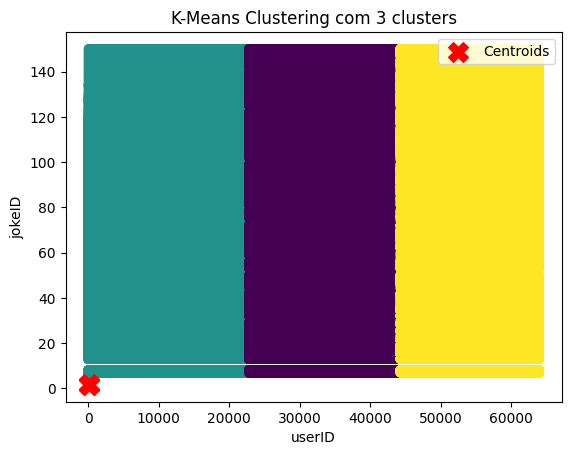

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir o número de clusters
k = 3

# Criar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Treinar o modelo com os dados
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels = kmeans.labels_

# Obter as coordenadas dos centros dos clusters
cluster_centers = kmeans.cluster_centers_

# Visualizar os clusters em um scatter plot
plt.scatter(X['userId'], X['jokeId'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('userID')
plt.ylabel('jokeID')
plt.legend()
plt.title('K-Means Clustering com 3 clusters')
plt.show()


Também não foi possível identificar relações entre os usuários e as preferências por piadas utilizando método K-means.

#Conclusão:
Criamos o modelo de previsão baseado no algoritmo SVD, o mesmo apresentou métricas de RMSE e MAE razoáveis e aceitáveis. O modelo se mostrou capaz de realizar as previsões, conforme demonstrado com três usuários. Infelizmente não foi possível identificar relações entre os usuários por meio dos modelos de clustering, portanto não é possível dizer com certeza se as indicações realizadas pelo modelo são realmente adequadas aos usuários.